In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Import Data

In [2]:
file = "indeks demokrasi.csv"

df = pd.read_csv(file, sep = ';')

df

,Unnamed: 0,provinsi,year,kebebasan_sipil,hak_politik,lembaga_demokrasi
0,32,MALUKU UTARA,2015,73.53,61.00,47.25
1,12,JAWA BARAT,2016,73.37,72.34,49.79
2,32,PAPUA BARAT,2011,93.59,43.99,50.03
3,27,SULAWESI TENGGARA,2013,84.32,28.95,50.32
4,34,PAPUA,2015,82.72,41.81,50.87
...,...,...,...,...,...,...
341,3,SUMATERA BARAT,2017,61.66,61.08,92.72
342,9,KEP. BANGKA BELITUNG,2020,79.12,66.20,92.97
343,11,DKI JAKARTA,2014,91.72,73.94,92.97
344,11,DKI JAKARTA,2011,89.94,58.32,93.50


In [3]:
indonesia = df.loc[df['provinsi'] == 'INDONESIA']

indonesia

,Unnamed: 0,provinsi,year,kebebasan_sipil,hak_politik,lembaga_demokrasi
55,0,INDONESIA,2016,76.45,70.11,62.05
103,0,INDONESIA,2015,80.30,70.63,66.87
136,0,INDONESIA,2012,77.94,46.33,69.28
164,0,INDONESIA,2013,79.00,46.25,72.24
168,0,INDONESIA,2017,78.75,66.63,72.49
191,0,INDONESIA,2011,80.79,47.54,74.72
194,0,INDONESIA,2018,78.46,65.79,75.25
200,0,INDONESIA,2020,79.40,67.85,75.66
201,0,INDONESIA,2014,82.62,63.72,75.81
241,0,INDONESIA,2019,77.20,70.71,78.73


In [4]:
indonesia = indonesia.sort_values(by = ['year'])

indonesia

,Unnamed: 0,provinsi,year,kebebasan_sipil,hak_politik,lembaga_demokrasi
191,0,INDONESIA,2011,80.79,47.54,74.72
136,0,INDONESIA,2012,77.94,46.33,69.28
164,0,INDONESIA,2013,79.00,46.25,72.24
201,0,INDONESIA,2014,82.62,63.72,75.81
103,0,INDONESIA,2015,80.30,70.63,66.87
55,0,INDONESIA,2016,76.45,70.11,62.05
168,0,INDONESIA,2017,78.75,66.63,72.49
194,0,INDONESIA,2018,78.46,65.79,75.25
241,0,INDONESIA,2019,77.20,70.71,78.73
200,0,INDONESIA,2020,79.40,67.85,75.66


# Kategorisasi Indeks Demokrasi

In [5]:
indonesia[['kebebasan_sipil', 'hak_politik', 'lembaga_demokrasi']].mean()

kebebasan_sipil      79.091
hak_politik          61.556
lembaga_demokrasi    72.310
dtype: float64

In [6]:
indonesia['IDI'] = indonesia[['kebebasan_sipil', 'hak_politik', 'lembaga_demokrasi']].mean(axis = 1)

In [7]:
indonesia

,Unnamed: 0,provinsi,year,kebebasan_sipil,hak_politik,lembaga_demokrasi,IDI
191,0,INDONESIA,2011,80.79,47.54,74.72,67.683333
136,0,INDONESIA,2012,77.94,46.33,69.28,64.516667
164,0,INDONESIA,2013,79.00,46.25,72.24,65.830000
201,0,INDONESIA,2014,82.62,63.72,75.81,74.050000
103,0,INDONESIA,2015,80.30,70.63,66.87,72.600000
55,0,INDONESIA,2016,76.45,70.11,62.05,69.536667
168,0,INDONESIA,2017,78.75,66.63,72.49,72.623333
194,0,INDONESIA,2018,78.46,65.79,75.25,73.166667
241,0,INDONESIA,2019,77.20,70.71,78.73,75.546667
200,0,INDONESIA,2020,79.40,67.85,75.66,74.303333


In [8]:
indonesia['kategori'] = None

indonesia

,Unnamed: 0,provinsi,year,kebebasan_sipil,hak_politik,lembaga_demokrasi,IDI,kategori
191,0,INDONESIA,2011,80.79,47.54,74.72,67.683333,None
136,0,INDONESIA,2012,77.94,46.33,69.28,64.516667,None
164,0,INDONESIA,2013,79.00,46.25,72.24,65.830000,None
201,0,INDONESIA,2014,82.62,63.72,75.81,74.050000,None
103,0,INDONESIA,2015,80.30,70.63,66.87,72.600000,None
55,0,INDONESIA,2016,76.45,70.11,62.05,69.536667,None
168,0,INDONESIA,2017,78.75,66.63,72.49,72.623333,None
194,0,INDONESIA,2018,78.46,65.79,75.25,73.166667,None
241,0,INDONESIA,2019,77.20,70.71,78.73,75.546667,None
200,0,INDONESIA,2020,79.40,67.85,75.66,74.303333,None


In [9]:
indonesia.loc[indonesia['IDI'] <60, 'kategori' ] = 'Buruk'
indonesia.loc[(indonesia['IDI'] >=60) & (indonesia['IDI'] <80), 'kategori'] = 'Sedang'
indonesia.loc[(indonesia['IDI'] >=80) , 'kategori'] = 'Baik'

In [10]:
indonesia = indonesia.drop(columns = 'Unnamed: 0')

indonesia

,provinsi,year,kebebasan_sipil,hak_politik,lembaga_demokrasi,IDI,kategori
191,INDONESIA,2011,80.79,47.54,74.72,67.683333,Sedang
136,INDONESIA,2012,77.94,46.33,69.28,64.516667,Sedang
164,INDONESIA,2013,79.00,46.25,72.24,65.830000,Sedang
201,INDONESIA,2014,82.62,63.72,75.81,74.050000,Sedang
103,INDONESIA,2015,80.30,70.63,66.87,72.600000,Sedang
55,INDONESIA,2016,76.45,70.11,62.05,69.536667,Sedang
168,INDONESIA,2017,78.75,66.63,72.49,72.623333,Sedang
194,INDONESIA,2018,78.46,65.79,75.25,73.166667,Sedang
241,INDONESIA,2019,77.20,70.71,78.73,75.546667,Sedang
200,INDONESIA,2020,79.40,67.85,75.66,74.303333,Sedang


# Eksplorasi Data

In [11]:
indonesia.describe()

,year,kebebasan_sipil,hak_politik,lembaga_demokrasi,IDI
count,10.00000,10.000000,10.00000,10.000000,10.000000
mean,2015.50000,79.091000,61.55600,72.310000,70.985667
std,3.02765,1.804189,10.48717,4.980183,3.839537
min,2011.00000,76.450000,46.25000,62.050000,64.516667
25%,2013.25000,78.070000,51.58500,70.020000,68.146667
50%,2015.50000,78.875000,66.21000,73.605000,72.611667
75%,2017.75000,80.075000,69.54500,75.557500,73.829167
max,2020.00000,82.620000,70.71000,78.730000,75.546667


# Visualisasi Data

In [12]:
import seaborn as sns

In [13]:
import matplotlib.font_manager as fm

In [14]:
path = "MADEAvenuePERSONALUSE-Regular.otf"
path2 = "Philosopher-Regular.ttf"
path3 = "Quicksand_Bold.otf"
path4 = "GrebackGrotesquePERSONAL-Regular.otf"



font1 = fm.FontProperties(fname = path, size = 20)
font2 = fm.FontProperties(fname = path2, size = 13)
font3 = fm.FontProperties(fname = path3, size = 10)
font4 = fm.FontProperties(fname = path4, size = 10)
font5 = fm.FontProperties(fname = path2, size = 10)

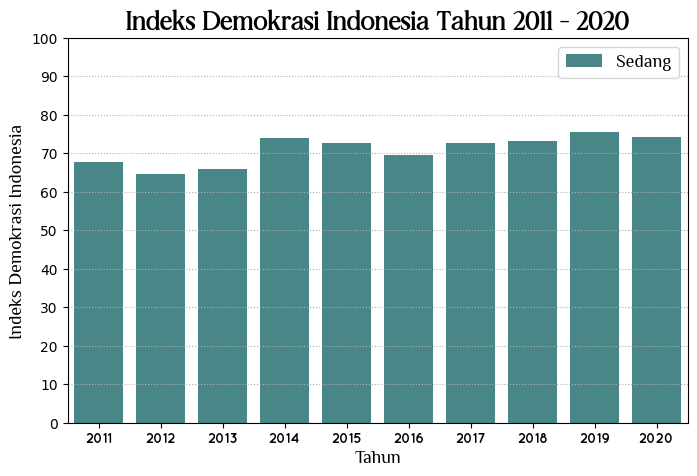

In [15]:
plt.figure(figsize = [8,5])


sns.barplot(data = indonesia, x = indonesia['year'], y = indonesia['IDI'], hue = 'kategori', palette = ['#3d9191'], zorder = 0)
plt.title('Indeks Demokrasi Indonesia Tahun 2011 - 2020', fontproperties = font1)
plt.xlabel('Tahun', fontproperties = font2)
plt.ylabel('Indeks Demokrasi Indonesia', fontproperties = font2)

plt.xticks(fontproperties = font3)
plt.yticks(np.arange(0, 110, 10))

plt.legend(prop = font2)

plt.grid(axis = 'y', linestyle = 'dotted')


plt.show()

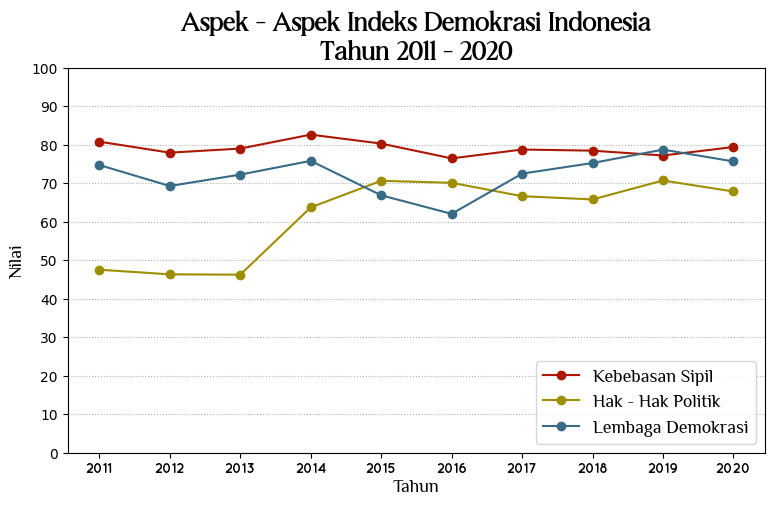

In [33]:
plt.figure(figsize = [9,5])


plt.plot(indonesia['year'], indonesia['kebebasan_sipil'], label = 'Kebebasan Sipil', color = '#aa1803', marker = 'o')
plt.plot(indonesia['year'], indonesia['hak_politik'], label = 'Hak - Hak Politik', color = '#9e8e01', marker = 'o')
plt.plot(indonesia['year'], indonesia['lembaga_demokrasi'], label = 'Lembaga Demokrasi', color = '#376b86', marker = 'o')




plt.title('Aspek - Aspek Indeks Demokrasi Indonesia\nTahun 2011 - 2020', fontproperties = font1)
plt.xlabel('Tahun', fontproperties = font2)
plt.ylabel('Nilai', fontproperties = font2)

plt.xticks(fontproperties = font3)
plt.yticks(np.arange(0, 110, 10))

plt.legend(prop = font2, loc = 'lower right')

plt.grid(axis = 'y', linestyle = 'dotted')

plt.xticks(np.arange(2011, 2021, 1))



plt.show()